# Lesson 4: Burgers

Convection and diffusion
$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = \nu\frac{\partial^2 u}{\partial x^2}$$

In [46]:
import numpy as np
import sympy as sp

In [47]:
from sympy import init_printing
init_printing(use_latex=True)

In [48]:
x, nu, t = sp.symbols('x nu t')

In [49]:
phi = (sp.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sp.exp(-(x - 4 * t - 2 * sp.pi)**2 / (4 * nu * (t + 1))))
phi

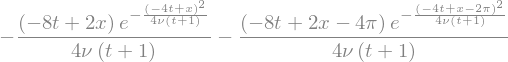

In [50]:
phiprime = phi.diff(x)
phiprime

In [51]:
from sympy.utilities.lambdify import lambdify
u = -2 *nu *(phiprime / phi) + 4

In [52]:
ufunc = lambdify((t,x,nu), u) # if it is a sympy expression it does the lambda for you
ufunc(1, 4, 3)

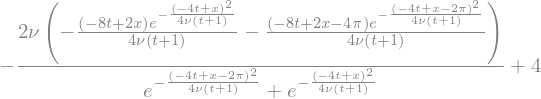

In [53]:
ufunc1 = lambda t, x, nu: u
ufunc1(1, 4, 3)

In [54]:
import matplotlib.pyplot as plt

nx = 101
nt = 100
dx = 2 * np.pi / (nx -1)
nu = 0.07
dt = dx*nu

In [55]:
x = np.linspace(0, 2*np.pi, nx)
un = np.empty(nx)
t= 0

u = np.asarray([ufunc(t, x0, nu) for x0 in x])
u

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

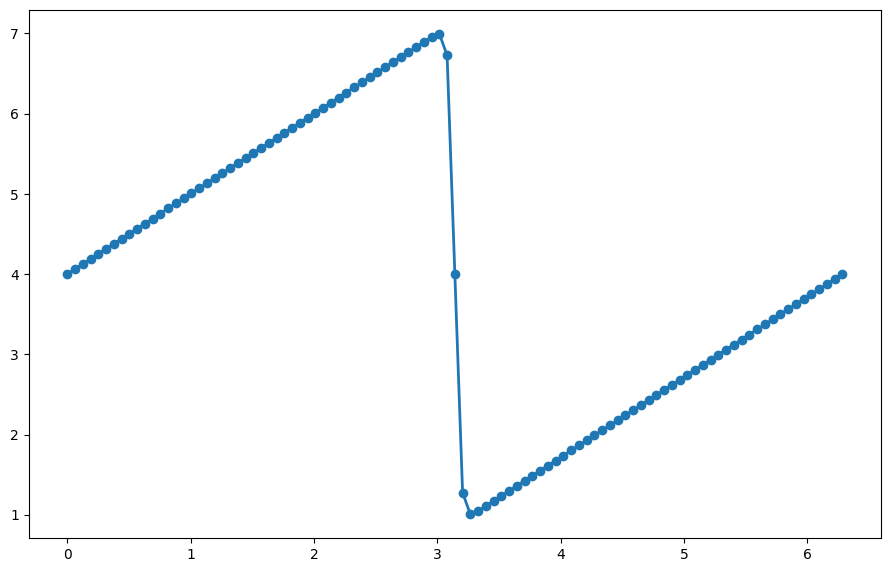

In [56]:
plt.figure(figsize=(11,7), dpi=100)
plt.plot(x,u, marker='o', lw=2)

In [57]:
#We have a shockwave analytic solution to the burgers equation, with initial condition
#the heat kernel

In [58]:
#To figure out the solution computationally like we were doing previously
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *(un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
        
u_analytical = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])

In [59]:
u

array([2.77501411, 2.81860393, 2.86219375, 2.90578357, 2.94937339,
       2.99296321, 3.03655303, 3.08014285, 3.12373267, 3.16732249,
       3.21091231, 3.25450213, 3.29809195, 3.34168177, 3.38527159,
       3.42886141, 3.47245123, 3.51604105, 3.55963087, 3.60322069,
       3.64681051, 3.69040033, 3.73399015, 3.77757997, 3.82116979,
       3.86475961, 3.90834943, 3.95193925, 3.99552907, 4.03911889,
       4.08270871, 4.12629853, 4.16988835, 4.21347816, 4.25706798,
       4.3006578 , 4.34424762, 4.38783744, 4.43142726, 4.47501708,
       4.5186069 , 4.56219672, 4.60578654, 4.64937636, 4.69296618,
       4.736556  , 4.78014582, 4.82373564, 4.86732546, 4.91091528,
       4.95450509, 4.9980949 , 5.0416847 , 5.08527447, 5.12886415,
       5.17245365, 5.21604272, 5.25963077, 5.30321645, 5.34679663,
       5.39036412, 5.43390242, 5.4773738 , 5.52069226, 5.56366213,
       5.60583953, 5.64622005, 5.68253942, 5.70972375, 5.71653417,
       5.67868075, 5.54649073, 5.23096356, 4.62161195, 3.72376

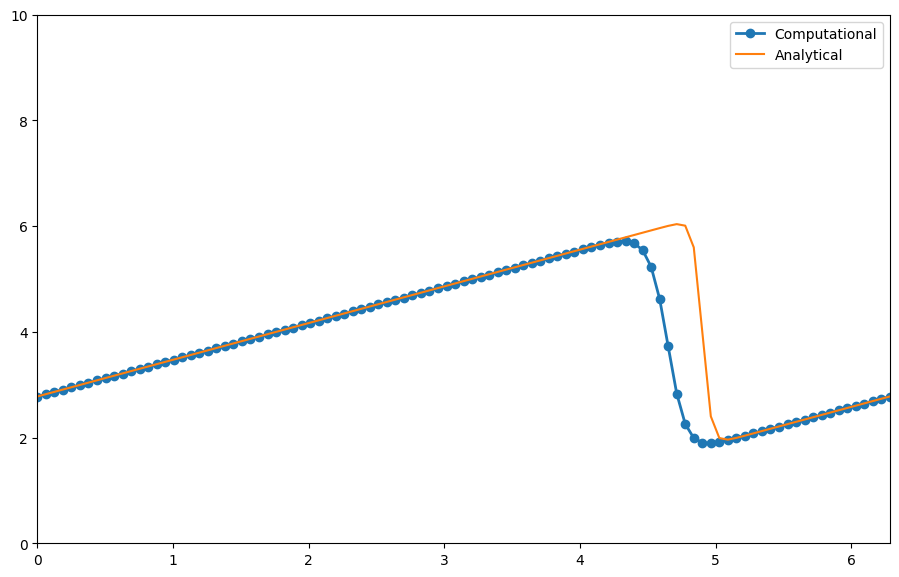

In [60]:
plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x,u, marker='o', lw=2, label='Computational')
plt.plot(x, u_analytical, label='Analytical')
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])
plt.legend();